In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import torch

d_model = 512

position = torch.arange(0, 200, dtype=torch.float).unsqueeze(1)
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
pe_sin = torch.sin(position * div_term)


[  0  28  56  85 113 141 170 198 226 255]


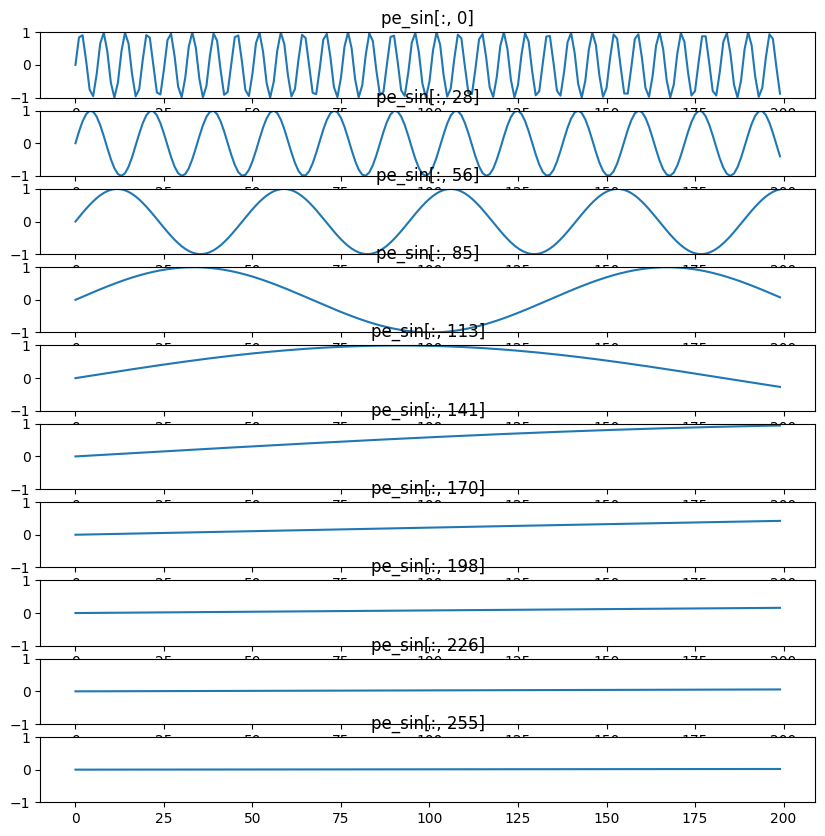

In [18]:
# plot pe_sin,  plot_dims in different sub plots
# use linspace to generate plot_dims
plot_dims = np.linspace(0, 255, num=10, dtype=int)
print(plot_dims)
fig, axs = plt.subplots(len(plot_dims), 1, figsize=(10, 10))
for i, i_dim in enumerate(plot_dims):
    axs[i].plot(pe_sin[:, i_dim])
    axs[i].set_title(f"pe_sin[:, {i_dim}]")
    # make y lim all [-1, 1]
    axs[i].set_ylim([-1, 1])


In [24]:
from hmr4d.network.base_arch.embeddings import FreqEncoder

encoder = FreqEncoder(input_dims=1)
out = encoder.embed(torch.arange(0, 200).unsqueeze(1))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


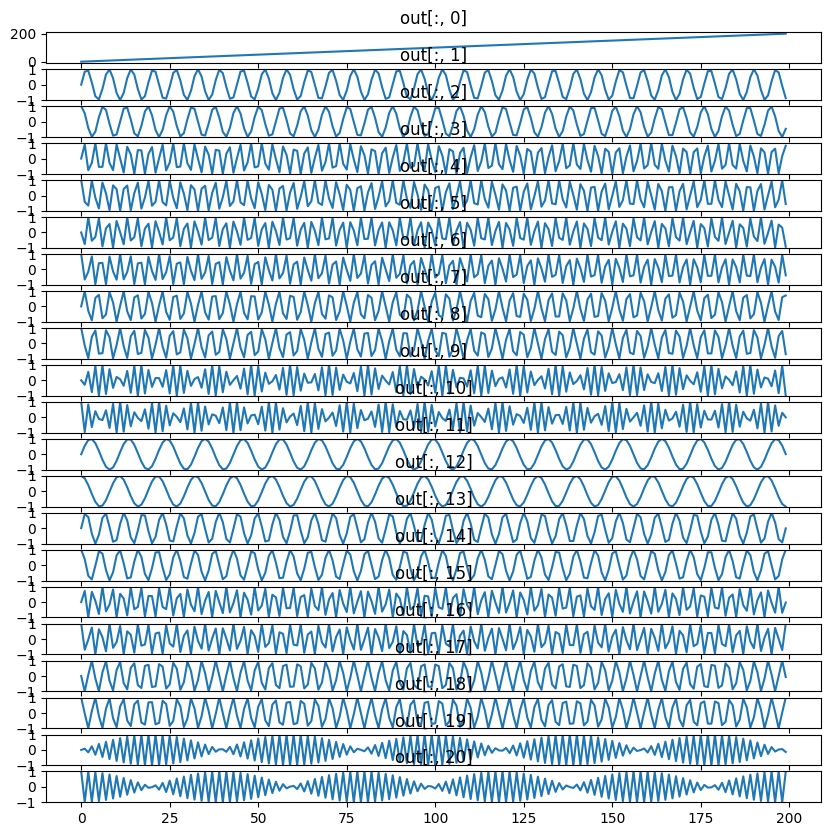

In [26]:
# plot 21 dims of out
plot_dims = np.linspace(0, 20, num=21, dtype=int)
print(plot_dims)
fig, axs = plt.subplots(len(plot_dims), 1, figsize=(10, 10))
for i, i_dim in enumerate(plot_dims):
    axs[i].plot(out[:, i_dim])
    axs[i].set_title(f"out[:, {i_dim}]")
    # make y lim all [-1, 1]
    if i != 0:
        axs[i].set_ylim([-1, 1])
    

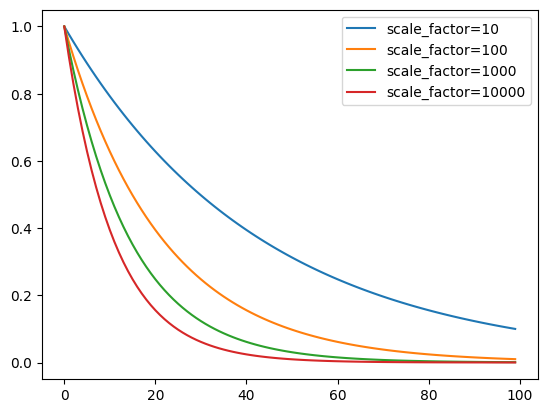

In [35]:
func = lambda  x, scale_factor : scale_factor ** (-x)
for scale_factor in [10, 100, 1000, 10000]:
    plt.plot(func(np.linspace(0, 1, 100), scale_factor), label=f"scale_factor={scale_factor}")
    # add legend of scale_factor
    plt.legend()